---
title: Pipeline
keywords: [pipeline, machine learning, supervised machine learning, data preprocessing, preprocessing, feature extraction, feature selection, model fitting]
description: In this notebook we are gonna be looking at the following steps in a pipeline preprocessing, feature extraction, feature selection, model fitting
author: Juma Shafara
date: "2024-03"
---

![Photo by DATAIDEA](../../assets/banner4.png)

## Pipeline

A pipeline is a series of data processing steps that are chained together sequentially. Each step in the pipeline typically performs some transformation on the data. In this notebook we are gonna be looking at the following steps in a pipeline: 

- Preprocessing
- Feature extraction
- Feature selection
- Model fitting

<!-- Newsletter -->
<div class="newsletter">
<div class="newsletter-heading">
<h4><i class="bi bi-info-circle-fill"></i> Don't Miss Any Updates!</h4>
</div>
<div class="newsletter-body">
<p>
Before we continue, we have a humble request, to be among the first to hear about future updates of the course materials, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
(formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataidea-science"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>
<iframe class="newsletter-frame" src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no">
</iframe>
</div>
</div>

### Let's redefine a model

In week 4, we introduced ourselves to Machine Learning Concepts, in week 5 we learned some statistical tests and we applied them in week 7 to find the best feature and transform them to efficient forms. In this section, we will build on top of those concepts to redefine what a Machine Learning model is and hence come up with a more efficient way of developing *good* Machine Learning models

First, let's install the `dataidea` package, which will help us with loading packages and datasets with much more ease

In [2]:
## install the version of dataidea used for this notebook
# !pip install --upgrade dataidea

In [3]:
# Let's import some packages

import numpy as np
import pandas as pd
import dataidea as di
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# loading the data set

data = di.loadDataset('boston')

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of [ Boston MA](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's

In [5]:
# looking at the top part

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Training our first model

In week 4, we learned that to train a model (for supervised machine learning), we needed to have a set of X variables (also called independent, predictor etc), and then, we needed a y variable (also called dependent, outcome, predicted etc).

In [6]:
# Selecting our X set and y

X = data.drop('MEDV', axis=1)
y = data.MEDV

Now we can train the `KNeighborsRegressor` model, this model naturally makes predictions by averaging the values of the 5 neighbors to the point that you want to predict

In [7]:
# lets traing the KNeighborsRegressor

knn_model = KNeighborsRegressor() # instanciate the model class
knn_model.fit(X, y) # train the model on X, y
score = knn_model.score(X, y) # obtain the model score on X, y
predicted_y = knn_model.predict(X) # make predictions on X
 
print('score:', score)

score: 0.716098217736928


Now lets go ahead and try to visualize the performance of the model. The scatter plot is of true labels against predicted labels. Do you think the model is doing well?

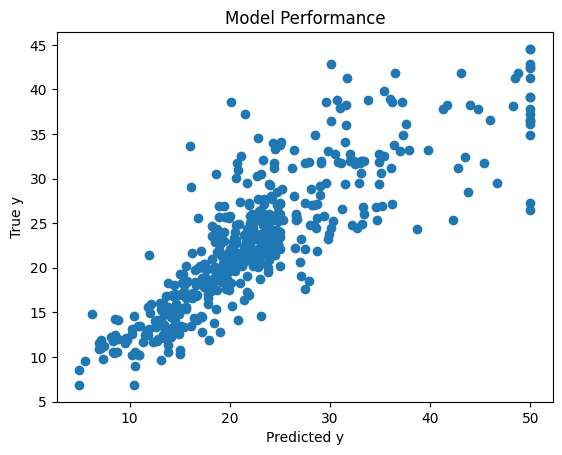

In [8]:
# looking at the performance 

plt.scatter(y, predicted_y)
plt.title('Model Performance')
plt.xlabel('Predicted y')
plt.ylabel('True y')
plt.show()

## Some feature selection.

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

In week 7 we learned that having irrelevant features in your data can decrease the accuracy of many models. In the code below, we try to find out the best features that best contribute to the outcome variable

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # score function for ANOVA with continuous outcome

In [10]:
# lets do some feature selection using ANOVA

data_num = data.drop(['CHAS','RAD'], axis=1) # dropping categorical
X = data_num.drop("MEDV", axis=1) 
y = data_num.MEDV

# using SelectKBest
test_reg = SelectKBest(score_func=f_regression, k=6) 
fit_boston = test_reg.fit(X, y)
indexes = fit_boston.get_support(indices=True)

print(fit_boston.scores_)
print(indexes)

[ 89.48611476  75.2576423  153.95488314 112.59148028 471.84673988
  83.47745922  33.57957033 141.76135658 175.10554288  63.05422911
 601.61787111]
[ 2  3  4  7  8 10]


From above, we can see from above that the best features for now are those in indexes `[ 2  3  4  7  8 10]` in the `num_data` dataset. Lets find them in the `data` and add on our categorical ones to set up our new X set

In [11]:
data_num.sample()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
211,0.37578,0.0,10.59,0.489,5.404,88.6,3.665,277.0,18.6,395.24,23.98,19.3


In [12]:
# redifining the X set 

new_X = data[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'CHAS','RAD']]

### Training our second model

Now that we have selected out the features, X that we thing best contribute to the outcome, let's retrain our machine learning model and see if we are gonna get better results

In [13]:
knn_model = KNeighborsRegressor()
knn_model.fit(new_X, y)
new_score = knn_model.score(new_X, y)
new_predicted_y = knn_model.predict(new_X)

print('Feature selected score:', new_score)

Feature selected score: 0.8324963639640872


The model seems to score better with a significant increment in accuracy from `0.71` to `0.83`. As like last time, let us try to visualize the difference in performance

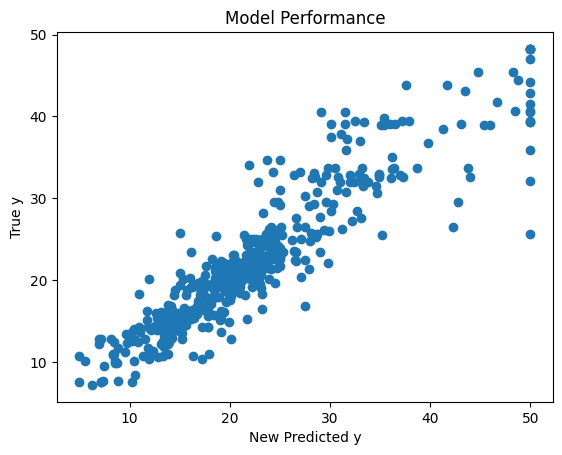

In [14]:
plt.scatter(y, new_predicted_y)
plt.title('Model Performance')
plt.xlabel('New Predicted y')
plt.ylabel('True y')
plt.show()

I do not know about you, but as for me, I notice a meaningful improvement in the predictions made from the model considering this scatter plot

## Transforming the data
In week 7, we learned some advantages of scaling our data like:

- preventing dominance by features with larger scales
- faster convergence in optimization algorithms
- reduce the impact of outliers


1. **Numeric Transformer**: 

In [27]:
# importing the StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciating the StandardScaler
scaler = StandardScaler() 

This initializes a `StandardScaler` which standardizes features by removing the mean and scaling to unit variance. It's applied to numeric columns to ensure they are on a similar scale.

In [16]:
standardized_data_num = scaler.fit_transform(
    data[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
    ) # rescaline numeric features
standardized_data_num_df = pd.DataFrame(
    standardized_data_num, 
    columns=['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'] 
    ) # converting the standardized to dataframe

In [17]:
standardized_data_num_df.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,-1.287909,-0.144217,0.413672,-0.666608,-1.459000,-1.075562
1,-0.593381,-0.740262,0.194274,-0.987329,-0.303094,-0.492439
2,-0.593381,-0.740262,1.282714,-0.987329,-0.303094,-1.208727
3,-1.306878,-0.835284,1.016303,-1.106115,0.113032,-1.361517
4,-1.306878,-0.835284,1.228577,-1.106115,0.113032,-1.026501


2. **Categorical Transformer**: 

In [28]:
# importing the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# instanciating the OneHotEncoder
one_hot_encoder = OneHotEncoder()

This initializes a `OneHotEncoder` which converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

In [19]:
encoded_data_cat = one_hot_encoder.fit_transform(data[['CHAS', 'RAD']])
encoded_data_cat_array = encoded_data_cat.toarray()
# Get feature names
feature_names = one_hot_encoder.get_feature_names_out(['CHAS', 'RAD'])

encoded_data_cat_df = pd.DataFrame(
    data=encoded_data_cat_array,
    columns=feature_names
)

In [20]:
encoded_data_cat_df.head()

,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Let us add that to the new X and form a standardized new X set

In [21]:
transformed_new_X = pd.concat(
    [standardized_data_num_df, encoded_data_cat_df], 
    axis=1
    )

In [22]:
transformed_new_X.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,CHAS_0,CHAS_1,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-1.287909,-0.144217,0.413672,-0.666608,-1.459000,-1.075562,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.593381,-0.740262,0.194274,-0.987329,-0.303094,-0.492439,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.593381,-0.740262,1.282714,-0.987329,-0.303094,-1.208727,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.306878,-0.835284,1.016303,-1.106115,0.113032,-1.361517,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.306878,-0.835284,1.228577,-1.106115,0.113032,-1.026501,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training our third model
Now that we have the *right* features selected and standardized, let us train a new model and see if it is gonna beat the first models

In [23]:
knn_model = KNeighborsRegressor()
knn_model.fit(transformed_new_X, y)
new_transformed_score = knn_model.score(transformed_new_X, y)
new_predicted_y = knn_model.predict(transformed_new_X)

print('Transformed score:', new_transformed_score)

Transformed score: 0.8734524530397529


This new models appears to do better than the earlier ones with an improvement in score from `0.83` to `0.87`. Do you think this is now a good model?

## The Pipeline

It turns out the above efforts to improve the performance of the model add extra steps to pass before you can have a *good* model. But what about if we can put together the transformers into on object we do most of that stuff.

The sklearn `Pipeline` allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

Let us build a model that puts together transformation and modelling steps into one `pipeline` object

In [24]:
# lets import the Pipeline from sklearn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
numeric_cols = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
categorical_cols = ['CHAS', 'RAD']

In [29]:
# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ])

# Pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

# display pipe
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['INDUS', 'NOX', 'RM', 'TAX',
                                                   'PTRATIO', 'LSTAT']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['CHAS', 'RAD'])])),
                ('model', KNeighborsRegressor())])

The code above sets up a data preprocessing and modeling pipeline using the `scikit-learn` library. Let's break down each part:

### Combine Preprocessing Steps

3. **ColumnTransformer**:
   ```python
   preprocessor = ColumnTransformer(
       transformers=[
           ('numerical', numeric_transformer, numeric_cols),
           ('categorical', categorical_transformer, categorical_cols)
       ])
   ```
   - The `ColumnTransformer` is used to apply different preprocessing steps to different columns of the data. It combines the `numeric_transformer` for numeric columns and the `categorical_transformer` for categorical columns.
   - `numeric_cols` and `categorical_cols` are lists containing the names of numeric and categorical columns respectively.

### Pipeline

4. **Pipeline Setup**:
   ```python
   pipe = Pipeline([
       ('preprocessor', preprocessor),
       ('model', KNeighborsRegressor())
   ])
   ```
   - A `Pipeline` is created which sequentially applies a list of transforms and a final estimator. 
   - The `preprocessor` step applies the `ColumnTransformer` defined earlier.
   - The `model` step applies a `KNeighborsRegressor`, which is a regression model that predicts the target variable based on the k-nearest neighbors in the feature space.

Now we can instead fit the Pipeline and use it for making predictions

In [30]:
# Fit the pipeline
pipe.fit(new_X, y)

# Score the pipeline
pipe_score = pipe.score(new_X, y)

# Predict using the pipeline
pipe_predicted_y = pipe.predict(new_X)

print('Pipe Score:', pipe_score)

Pipe Score: 0.8734524530397529


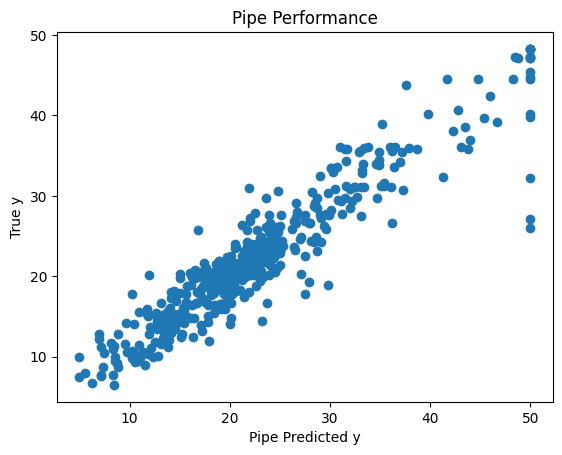

In [ ]:
plt.scatter(y, pipe_predicted_y)
plt.title('Pipe Performance')
plt.xlabel('Pipe Predicted y')
plt.ylabel('True y')
plt.show()

We can observe that the model still gets the same good score, but now all the transformation steps, both on numeric and categorical variables are in a single pipeline object together with the model.

<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-dark"
        crossorigin="anonymous"
        async>
</script>